In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

from functools import lru_cache

sp.init_printing()

In [190]:
%%latex

Consider the mutually recursive sequences:
    
\begin{align*}
    a_n &= \sum_{k=1}^{n-1}(1-p)^{k-1}p(1+b_{n-k}) \\
    b_n &= \sum_{k=2}^{n-1}(1-p)^{k-2}p(1+a_{n-k})
\end{align*}

where $a_0 = b_0 = 0$.

<IPython.core.display.Latex object>

In [10]:
@lru_cache(maxsize=None) 
def fa(n, p): 
    if n == 0: return 0 
    return sum((1-p)**(k-1)*p*(1+fb(n-k, p)) for k in range(1,n)) 

@lru_cache(maxsize=None) 
def fb(n, p): 
    if n == 0: return 0 
    return sum((1-p)**(k-2)*p*(1+fa(n-k, p)) for k in range(2,n))

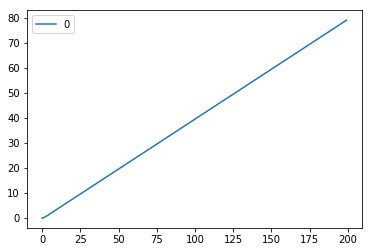

In [19]:
N = 200
p = 1/2
pd.DataFrame([fa(n,p) for n in range(N)]).plot()

In [25]:
a, b = sp.symbols('a, b')
z = sp.symbols('z', positive=True)
k, j, n = sp.symbols('k, j, n', nonnegative=True)
p = sp.symbols('p', positive=True)

In [54]:
ans1 = sp.Sum(sp.Sum((1-p)**(k-1)*p*z**n, (k,1,n-1)), (n,2,sp.oo)) + sp.Sum((1-p)**(k-1)*p*z**k*b, (k,1,sp.oo))
ans1

  ∞                            ∞   n - 1                   
 ___                          ___   ___                    
 ╲                            ╲     ╲                      
  ╲        k         k - 1     ╲     ╲      n         k - 1
  ╱   b⋅p⋅z ⋅(-p + 1)      +   ╱     ╱   p⋅z ⋅(-p + 1)     
 ╱                            ╱     ╱                      
 ‾‾‾                          ‾‾‾   ‾‾‾                    
k = 1                        n = 2 k = 1                   

In [55]:
r1 = ans1.doit().subs(z < 1, True).subs(z*sp.Abs(p-1) < 1, True)
eq1 = sp.Eq(a, r1)

In [56]:
ans2 = sp.Sum(sp.Sum((1-p)**(k-2)*p*z**n, (k,2,n-1)), (n,2,sp.oo)) + sp.Sum((1-p)**(k-2)*p*z**k*a, (k,2,sp.oo))
ans2

  ∞                            ∞   n - 1                   
 ___                          ___   ___                    
 ╲                            ╲     ╲                      
  ╲        k         k - 2     ╲     ╲      n         k - 2
  ╱   a⋅p⋅z ⋅(-p + 1)      +   ╱     ╱   p⋅z ⋅(-p + 1)     
 ╱                            ╱     ╱                      
 ‾‾‾                          ‾‾‾   ‾‾‾                    
k = 2                        n = 2 k = 2                   

In [57]:
r2 = ans2.doit().subs(z < 1, True).subs(z*sp.Abs(p-1) < 1, True)
eq2 = sp.Eq(b, r2)

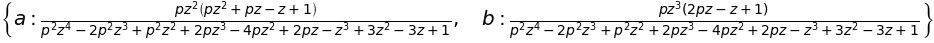

In [60]:
ans = sp.solve((eq1, eq2), (a, b))
ans

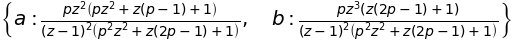

In [66]:
Ga = sp.factor(ans[a], z)
Gb = sp.factor(ans[b], z)
{a: Ga, b: Gb}

In [68]:
sp.series(Ga, z, n=10).subs(p, .5)

In [71]:
fa(9,.5)

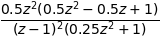

In [73]:
Ga.subs(p,.5)

In [134]:
eq = sp.Eq(sp.diff(Ga,z), 0)
sp.solveset(eq, z, domain=sp.S.Complexes)

KeyboardInterrupt: 

In [102]:
print(eq.subs(p, .5))

Eq((-0.5*z**2*(z - 1)*(0.5*z**2 - 0.5*z + 1) - 2*z*(0.25*z**2 + 1)*(0.5*z**2 - 0.5*z + 1) + (z - 1)*(0.25*z**2 + 1)*(1.0*z**2 + z*(1.0*z - 0.5) - 1.0*z + 2))/((z - 1)*(0.25*z**2 + 1)*(0.5*z**2 - 0.5*z + 1)), n + 1)


In [101]:
(z*sp.simplify(sp.diff(Ga, z))/Ga).subs(z, 1)

In [113]:
sp.series(Ga, z, n=10)

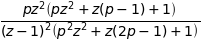

In [114]:
Ga

In [127]:
sp.solveset(z**2+1, z)

In [133]:
sp.__version__

'1.2'

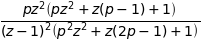

In [135]:
Ga

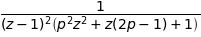

In [138]:
Ra = 1/((z-1)**2*(p**2*z**2 + z*(2*p-1) + 1))
Ra

In [158]:
sols = sp.solve(sp.Eq(sp.diff(Ra, z), 0), z)

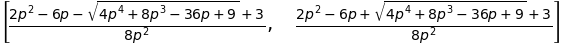

In [159]:
sols

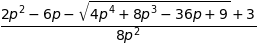

In [160]:
sols[0]

In [167]:
f = lambda z: sp.ln(Ra) - (n+1)*sp.ln(z)

In [170]:
sp.solveset(sp.diff(f(z), z), 0)

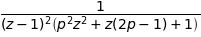

In [171]:
Ra

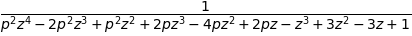

In [172]:
sp.expand(Ra)

[ 0.37026975 -1.64576683  0.92455208  0.99634195] [[ 9.35702592e-08  4.87583371e-07 -2.53664629e-07  2.26361552e-07]
 [ 4.87583371e-07  2.61001861e-06 -1.39315725e-06  1.26578518e-06]
 [-2.53664629e-07 -1.39315725e-06  7.61204163e-07 -7.02659547e-07]
 [ 2.26361552e-07  1.26578518e-06 -7.02659547e-07  6.55637943e-07]]
float64 float64


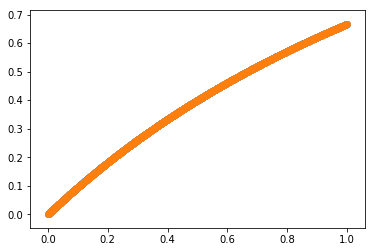

In [265]:
# Ansantz: [z^n]G(z) ~ az + b
from scipy.optimize import curve_fit
E = 1000
N = 200

X = range(N)

# data = np.array([
#     [ (x, fa(x, pr)) for x in X ]
#     for pr in np.linspace(0+1/E,1,E)
# ])

data = [
    (pr, np.polyfit(x=X, y=[fa(x, pr) for x in X], deg=1)[0])
    for pr in np.linspace(0+1/E,1-1/E,E)
]

def g(x, a, b, c, d):
    # return a*np.exp(b+d*x) + c
    return a*np.sinh(b+d*x) + c


xs, ys = [np.array(z, dtype=np.float64) for z in zip(*data)]
popt, pcov = curve_fit(g, xs, ys)
print(popt, pcov)
plt.scatter(xs, ys)

print(xs.dtype, ys.dtype)
# cs = np.polyfit(xs, ys, deg=4)
# print(cs)
# plt.scatter(xs, np.polyval(cs, xs))
plt.scatter(xs, g(xs, *popt))


# pd.DataFrame(ys).plot(lw=2, marker='o')

# xs = np.linspace(0, N, E)
# plt.plot(xs, np.polyval(cs, xs))

In [176]:
sp.series(Ga.subs(p,.5), z, n=21)

In [ ]:
[fa(x, .5) for x in range(0)]